In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt

In [2]:
def FHN(self, X):
        x1, y1, x2, y2 = X
        return [x1*(a-x1)*(x1-1) - y1 + k*(x2-x1),
                b1*x1 - c*y1,
                x2*(a-x2)*(x2-1) - y2 + k*(x1-x2),
                b2*x2 - c*y2
               ]

In [3]:
a = -0.025794
c = 0.02
b1 = 0.0135
b2 = 0.0065
k = 0.129
sigma = 1
alpha = 0.35
eps = 1
beta = 10e-8
q=1.6

In [4]:
sol = solve_ivp(FHN, [0, 25000], [-0.1, 0.1, -0.1, -0.1], 
                t_eval=np.array(range(0, 25000, 2)), rtol = 1e-11, atol = 1e-11, dense_output=True)

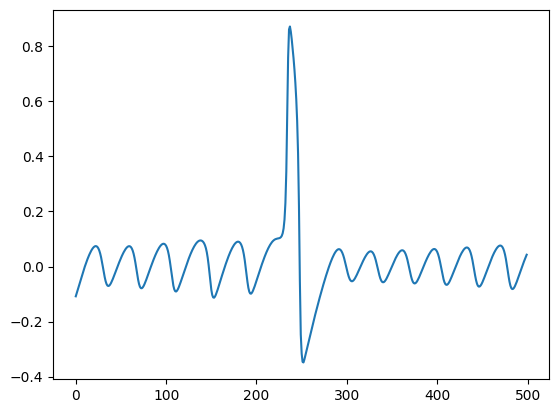

In [5]:
plt.plot(sol.y[0][600:1100])

In [43]:
fhn_spike = sol.y[0][600:1100]
fhn_spike -= fhn_spike.min()

In [48]:
fhn_4095 = np.interp(np.arange(0, 500, 0.12), np.arange(0, 500), fhn_spike)[-4095:]

In [49]:
len(fhn_4095)

4095

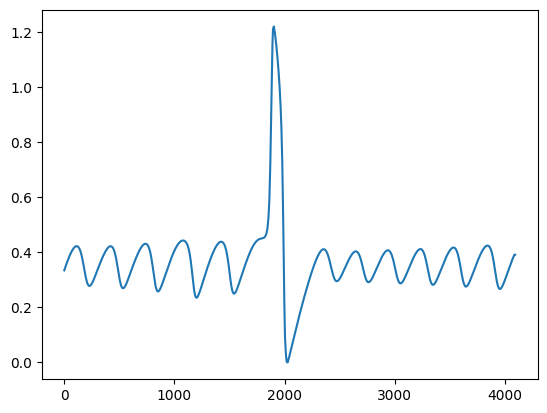

In [51]:
plt.plot(fhn_4095)

In [9]:
def Convert(x, old_low=0, old_high=5, new_low=0, new_high=4095):
    interval_0_1 = (x - old_low) / (old_high - old_low)
    scaled = new_low + (new_high - new_low) * interval_0_1
    return scaled.astype(int)
    

In [52]:
converted = Convert(fhn_4095)

In [55]:
res = np.zeros(4500) + 300
res[1600:2400] = converted[1600:2400]

In [57]:
np.savetxt("FHN/fhn_spike4095UpBaseLine.txt", res)


In [20]:
from scipy.ndimage import gaussian_filter
#blurred = gaussian_filter(a, sigma=7)

In [36]:
res[1400:1800] = gaussian_filter(res[1400:1800], sigma=30, radius=40)
res[2200:2800] = gaussian_filter(res[2200:2800], sigma=100, radius=50)


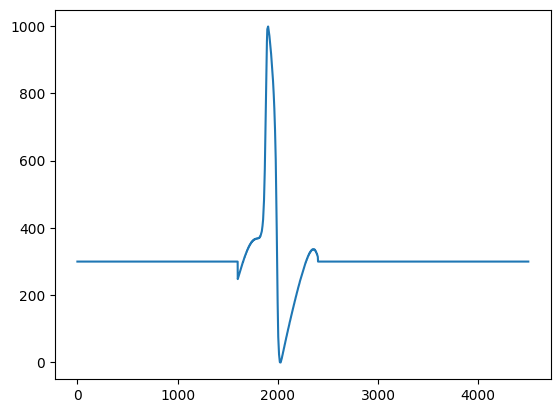

In [56]:
plt.plot(res)